In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Which countries are F1 constructors from?

In [50]:
constructors = pd.read_csv('constructors.csv', dtype = {'nationality': str})
constructors

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,NaN
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1,NaN
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Force_India,NaN


In [51]:
#find the number of unique nationalities represented
len(constructors.groupby('nationality').count()['constructorRef'])

24

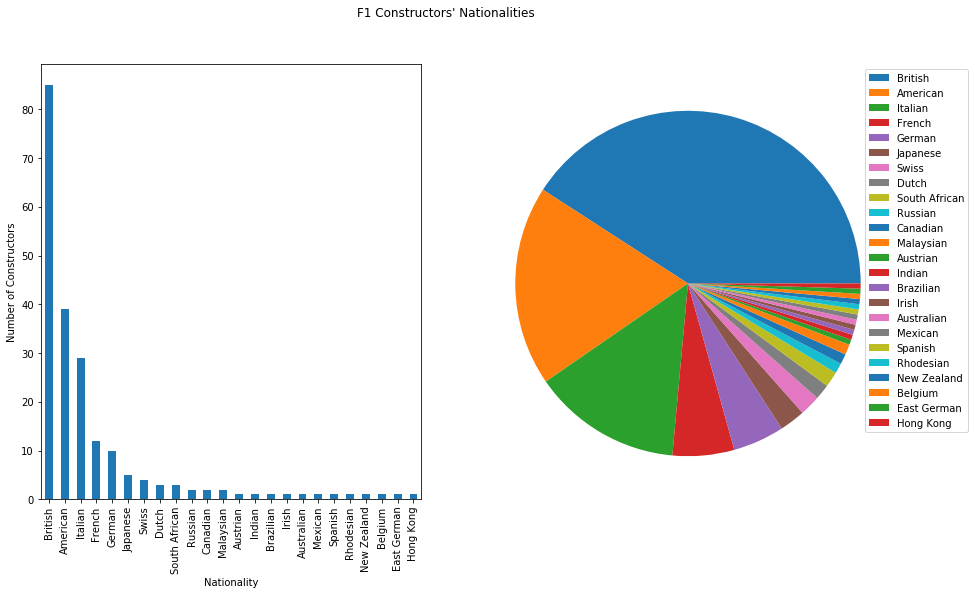

In [52]:
#set dataframe
countries = pd.DataFrame(constructors.nationality.value_counts(), columns = ['nationality'])

#chart results
plt.figure(figsize = (15,8))
plt.suptitle('F1 Constructors\' Nationalities')

plt.subplot(1,2,1)
constructors.nationality.value_counts().head(24).plot(kind = 'bar')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')

plt.subplot(1,2,2)
plt.pie(countries)
plt.axis('equal')
plt.legend(countries.index, bbox_to_anchor = (1.25, 1), loc = 'upper right')
plt.show()

We can see that the vast majority of Formula 1 teams throughout history have called the United Kingdom home. The USA, Italy, France, and Germany are also popular countries to set up shop. We can see from the constructor's data that 208 separate constructors have at one time participated in the F1 World Championship, but most were short lived and are now defunct. Let's see which teams have participated in the most races.

### Which F1 constructors have participated in the most races?

In [53]:
results = pd.read_csv('results.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
5,6,18,6,3,8.0,13,6.0,6,6,3.0,57,NaN,NaN,50.0,14.0,01:29.6,212.974,11
6,7,18,7,5,14.0,17,7.0,7,7,2.0,55,NaN,NaN,22.0,12.0,01:29.5,213.224,5
7,8,18,8,6,1.0,15,8.0,8,8,1.0,53,NaN,NaN,20.0,4.0,01:27.9,217.18,5
8,9,18,9,2,4.0,2,NaN,R,9,0.0,47,NaN,NaN,15.0,9.0,01:28.8,215.1,4
9,10,18,10,7,12.0,18,NaN,R,10,0.0,43,NaN,NaN,23.0,13.0,01:29.6,213.166,3


In [66]:
active_cons_25 = pd.DataFrame(results.constructorId.value_counts())
active_cons_25.rename(columns = {'constructorId':'numRaces'}, inplace = True)
active_cons_25

,numRaces
6,2140
1,1625
3,1379
25,881
32,871
15,747
18,672
4,669
34,662
27,611


In [77]:
join_cons_res = constructors.set_index('constructorId').join(active_cons_25, lsuffix = 'cons', rsuffix = 'res')
join_cons_res = join_cons_res.sort_values('numRaces', ascending = False)
join_cons_res

,constructorRef,name,nationality,url,Unnamed: 5,numRaces
constructorId,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0
15,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber,NaN,747.0
18,minardi,Minardi,Italian,http://en.wikipedia.org/wiki/Minardi,NaN,672.0
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN,669.0
34,brabham,Brabham,British,http://en.wikipedia.org/wiki/Brabham,NaN,662.0


In [78]:
join_cons_res_25 = join_cons_res.head(25)
join_cons_res_25

,constructorRef,name,nationality,url,Unnamed: 5,numRaces
constructorId,,,,,,
6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN,2140.0
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,1625.0
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,1379.0
25,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,NaN,881.0
32,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,NaN,871.0
15,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber,NaN,747.0
18,minardi,Minardi,Italian,http://en.wikipedia.org/wiki/Minardi,NaN,672.0
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN,669.0
34,brabham,Brabham,British,http://en.wikipedia.org/wiki/Brabham,NaN,662.0


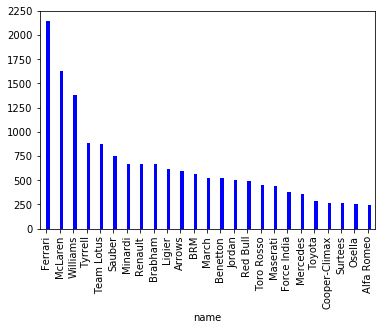

In [105]:
join_cons_res_25.plot.bar(x='name', legend = False, color = 'blue')